In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn import preprocessing

from numpy import sort
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/cleaned_train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
X_train = train.copy()
X_train.drop(columns=['Opportunity_Created_Year', 'Month', 'Account_Created_Date', 'Unnamed: 0', 'Target'], inplace=True)

In [4]:
Region = list(train['Region'])
le = preprocessing.LabelEncoder()
Region_codificada = le.fit_transform(Region)
X_train['Region'] = Region_codificada

Territory = list(train['Territory'])
le = preprocessing.LabelEncoder()
Territory_codificada = le.fit_transform(Territory)
X_train['Territory'] = Territory_codificada

Billing_Country = list(train['Billing_Country'])
le = preprocessing.LabelEncoder()
Billing_Country_codificada = le.fit_transform(Billing_Country)
X_train['Billing_Country'] = Billing_Country_codificada

Account_Name = list(train['Account_Name'])
le = preprocessing.LabelEncoder()
Account_Name_codificada = le.fit_transform(Account_Name)
X_train['Account_Name'] = Account_Name_codificada

Opportunity_Name = list(train['Opportunity_Name'])
le = preprocessing.LabelEncoder()
Opportunity_Name_codificada = le.fit_transform(Opportunity_Name)
X_train['Opportunity_Name'] = Opportunity_Name_codificada

Account_Owner = list(train['Account_Owner'])
le = preprocessing.LabelEncoder()
Account_Owner_codificada = le.fit_transform(Account_Owner)
X_train['Account_Owner'] = Account_Owner_codificada

Opportunity_Type = list(train['Opportunity_Type'])
le = preprocessing.LabelEncoder()
Opportunity_Type_codificada = le.fit_transform(Opportunity_Type)
X_train['Opportunity_Type'] = Opportunity_Type_codificada

Quote_Type = list(train['Quote_Type'])
le = preprocessing.LabelEncoder()
Quote_Type_codificada = le.fit_transform(Quote_Type)
X_train['Quote_Type'] = Quote_Type_codificada

Account_Type = list(train['Account_Type'])
le = preprocessing.LabelEncoder()
Account_Type_codificada = le.fit_transform(Account_Type)
X_train['Account_Type'] = Account_Type_codificada

Opportunity_Owner = list(train['Opportunity_Owner'])
le = preprocessing.LabelEncoder()
Opportunity_Owner_codificada = le.fit_transform(Opportunity_Owner)
X_train['Opportunity_Owner'] = Opportunity_Owner_codificada

Delivery_Terms = list(train['Delivery_Terms'])
le = preprocessing.LabelEncoder()
Delivery_Terms_codificada = le.fit_transform(Delivery_Terms)
X_train['Delivery_Terms'] = Delivery_Terms_codificada

Currency = list(train['Currency'])
le = preprocessing.LabelEncoder()
Currency_codificada = le.fit_transform(Currency)
X_train['Currency'] = Currency_codificada

Last_Modified_By = list(train['Last_Modified_By'])
le = preprocessing.LabelEncoder()
Last_Modified_By_codificada = le.fit_transform(Last_Modified_By)
X_train['Last_Modified_By'] = Last_Modified_By_codificada

Product_Family = list(train['Product_Family'])
le = preprocessing.LabelEncoder()
Product_Family_codificada = le.fit_transform(Product_Family)
X_train['Product_Family'] = Product_Family_codificada

Product_Name = list(train['Product_Name'])
le = preprocessing.LabelEncoder()
Product_Name_codificada = le.fit_transform(Product_Name)
X_train['Product_Name'] = Product_Name_codificada

ASP_Currency = list(train['ASP_Currency'])
le = preprocessing.LabelEncoder()
ASP_Currency_codificada = le.fit_transform(ASP_Currency)
X_train['ASP_Currency'] = ASP_Currency_codificada

ASP_converted_Currency = list(train['ASP_(converted)_Currency'])
le = preprocessing.LabelEncoder()
ASP_converted_Currency_codificada = le.fit_transform(ASP_converted_Currency)
X_train['ASP_(converted)_Currency'] = ASP_converted_Currency_codificada

Delivery_Quarter = list(train['Delivery_Quarter'])
le = preprocessing.LabelEncoder()
Delivery_Quarter_codificada = le.fit_transform(Delivery_Quarter)
X_train['Delivery_Quarter'] = Delivery_Quarter_codificada

Total_Amount_Currency = list(train['Total_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Amount_Currency_codificada = le.fit_transform(Total_Amount_Currency)
X_train['Total_Amount_Currency'] = Total_Amount_Currency_codificada

Total_Taxable_Amount_Currency = list(train['Total_Taxable_Amount_Currency'])
le = preprocessing.LabelEncoder()
Total_Taxable_Amount_Currency_codificada = le.fit_transform(Total_Taxable_Amount_Currency)
X_train['Total_Taxable_Amount_Currency'] = Total_Taxable_Amount_Currency_codificada

Prod_Category_A = list(train['Prod_Category_A'])
le = preprocessing.LabelEncoder()
Prod_Category_A_codificada = le.fit_transform(Prod_Category_A)
X_train['Prod_Category_A'] = Prod_Category_A_codificada

Bureaucratic_Code = list(train['Bureaucratic_Code'])
le = preprocessing.LabelEncoder()
Bureaucratic_Code_codificada = le.fit_transform(Bureaucratic_Code)
X_train['Bureaucratic_Code'] = Bureaucratic_Code_codificada

X_train["Total_Amount"] = pd.to_numeric(train["Total_Amount"],errors='coerce')

In [5]:
X_train

,Opportunity_ID,Items_Count,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Billing_Country,...,diferencia_en_dias,Last_Modified_DOY,Last_Modified_Year,Opportunity_Created_DOY,Quote_Expiry_DOY,Quote_Expiry_Year,Planned_Delivery_Start_DOY,Planned_Delivery_Start_Year,Planned_Delivery_End_DOY,Planned_Delivery_End_Year
0,0,1,2,46,1,1,1,0,4,52,...,189,165,2016,341,30.0,2016.0,122,2016,182.0,2016.0
1,1,1,2,46,0,0,0,0,4,52,...,39,15,2016,341,20.0,2016.0,18,2016,20.0,2016.0
2,2,1,1,43,0,0,0,0,4,77,...,296,273,2016,342,274.0,2016.0,25,2016,25.0,2016.0
3,3,1,1,43,1,1,0,0,5,77,...,840,86,2018,342,NaN,NaN,32,2018,90.0,2018.0
4,4,1,1,43,1,1,0,0,5,77,...,840,86,2018,342,153.0,2017.0,32,2018,59.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,12799,1,2,47,1,0,0,0,4,27,...,119,92,2016,338,94.0,2016.0,92,2016,112.0,2016.0
9787,12800,2,1,42,1,0,0,0,5,27,...,311,284,2016,338,15.0,2016.0,277,2016,365.0,2016.0
9788,12801,3,2,3,1,1,1,0,4,4,...,46,19,2016,338,NaN,NaN,81,2016,85.0,2016.0
9789,12802,1,1,42,1,1,1,0,4,77,...,48,22,2016,339,60.0,2016.0,116,2016,120.0,2016.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_train, train.Target, test_size=0.33, random_state=7)

In [7]:
model = XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
 
    selection_model = XGBClassifier(use_label_encoder =False)
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[03:16:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.57%
[03:16:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=44, Accuracy: 86.57%
[03:16:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=44, Accuracy: 86.57%
[03:16:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was change

Thresh=0.017, n=17, Accuracy: 84.81%
[03:16:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.017, n=16, Accuracy: 84.56%
[03:16:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=15, Accuracy: 85.15%
[03:16:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.019, n=14, Accuracy: 85.40%
[03:16:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation me

<Figure size 25200x25200 with 0 Axes>

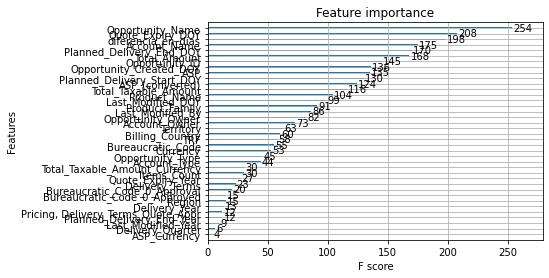

In [10]:
fig = plt.gcf()
fig.set_size_inches(350, 350)
selection = SelectFromModel(model, threshold=0.040, prefit=True)
selected_dataset = selection.transform(x_train)
xgb.plot_importance(booster=model)
plt.show()